In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("Student_Performance.csv")
df.head()

,Hours_Studied,Previous_Scores,Extracurricular_Activities,Sleep_Hours,Sample_Question_Papers_Practiced,Performance_Index,Students_Attendance,Target
0,7,99,Yes,9,1,91,70,Dropout
1,4,82,No,4,2,65,92,Graduate
2,8,51,Yes,7,2,45,67,Dropout
3,5,52,Yes,5,2,36,82,Graduate
4,7,75,No,8,5,66,80,Graduate


In [3]:
#selecting only the data frames we will use
df = df[["Hours_Studied", "Previous_Scores","Extracurricular_Activities","Sleep_Hours","Performance_Index","Students_Attendance", "Target"]]
df.head()

,Hours_Studied,Previous_Scores,Extracurricular_Activities,Sleep_Hours,Performance_Index,Students_Attendance,Target
0,7,99,Yes,9,91,70,Dropout
1,4,82,No,4,65,92,Graduate
2,8,51,Yes,7,45,67,Dropout
3,5,52,Yes,5,36,82,Graduate
4,7,75,No,8,66,80,Graduate


In [4]:
#information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               10000 non-null  int64 
 1   Previous_Scores             10000 non-null  int64 
 2   Extracurricular_Activities  10000 non-null  object
 3   Sleep_Hours                 10000 non-null  int64 
 4   Performance_Index           10000 non-null  int64 
 5   Students_Attendance         10000 non-null  int64 
 6   Target                      10000 non-null  object
dtypes: int64(5), object(2)
memory usage: 547.0+ KB


In [5]:
 #droping row where data is not a number
df = df.dropna()
df.isnull().sum()

Hours_Studied                 0
Previous_Scores               0
Extracurricular_Activities    0
Sleep_Hours                   0
Performance_Index             0
Students_Attendance           0
Target                        0
dtype: int64

In [6]:
df = df.drop("Extracurricular_Activities", axis = 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Hours_Studied        10000 non-null  int64 
 1   Previous_Scores      10000 non-null  int64 
 2   Sleep_Hours          10000 non-null  int64 
 3   Performance_Index    10000 non-null  int64 
 4   Students_Attendance  10000 non-null  int64 
 5   Target               10000 non-null  object
dtypes: int64(5), object(1)
memory usage: 468.9+ KB


In [7]:
df.head()

,Hours_Studied,Previous_Scores,Sleep_Hours,Performance_Index,Students_Attendance,Target
0,7,99,9,91,70,Dropout
1,4,82,4,65,92,Graduate
2,8,51,7,45,67,Dropout
3,5,52,5,36,82,Graduate
4,7,75,8,66,80,Graduate


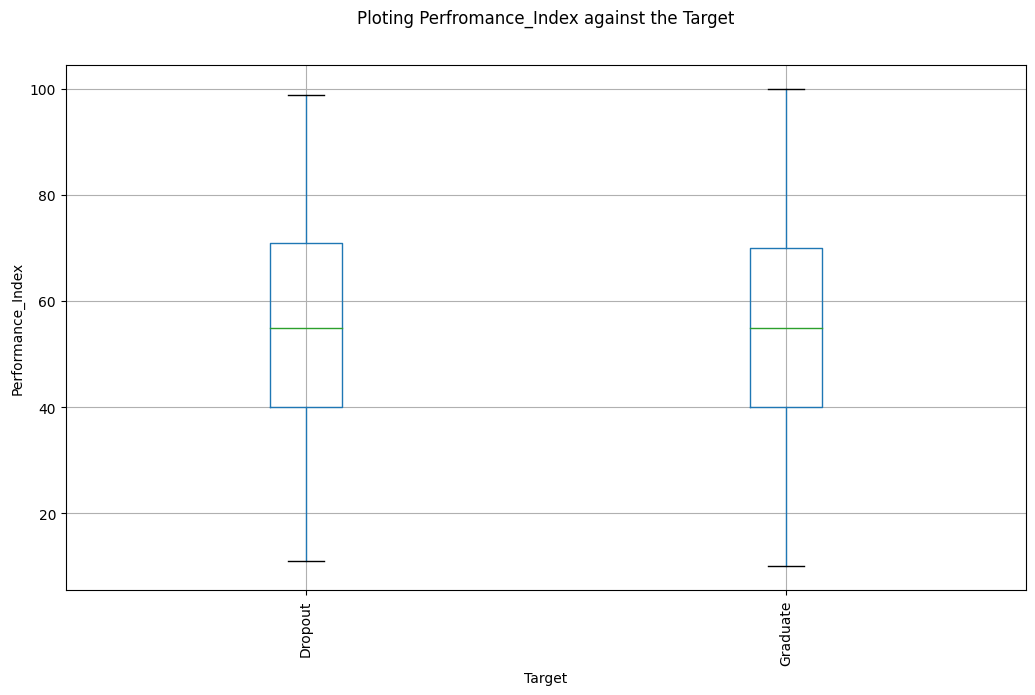

In [8]:
# ploting performance_index against target

fig, ax = plt.subplots(1,1, figsize=(12, 7))
df.boxplot('Performance_Index', 'Target', ax=ax)
plt.suptitle('Ploting Perfromance_Index against the Target')
plt.title('')
plt.ylabel('Performance_Index')
plt.xticks(rotation=90)
plt.show()

In [9]:
df = df[df["Performance_Index"]<= 70]
df = df[df["Performance_Index"]>= 45]
df = df[df["Target"] != 'other']

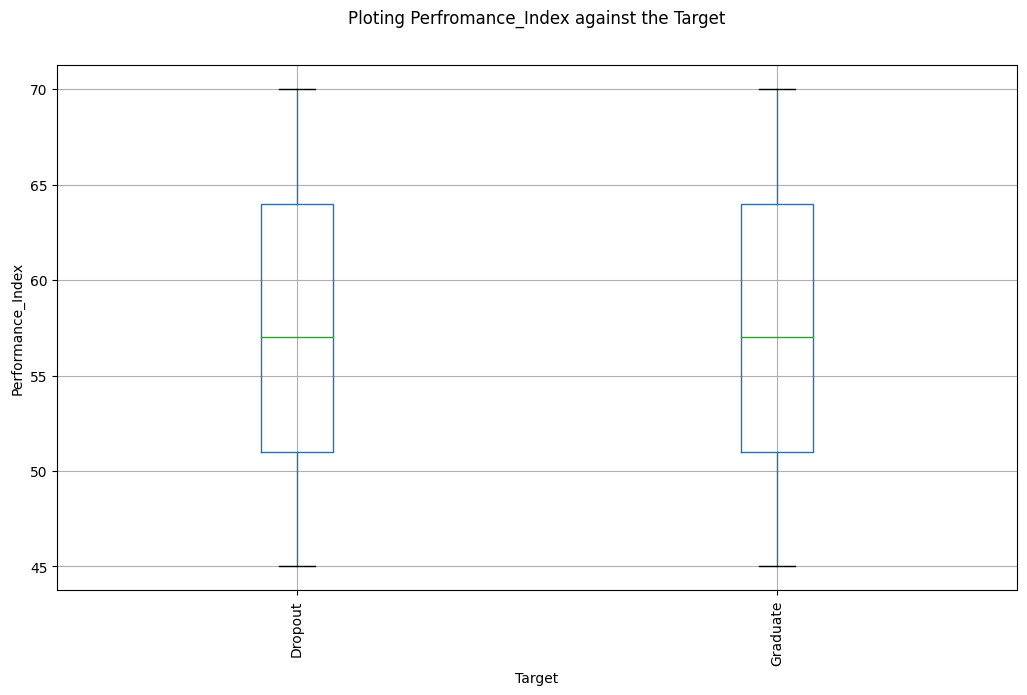

In [10]:
# ploting performance_index against target

fig, ax = plt.subplots(1,1, figsize=(12, 7))
df.boxplot('Performance_Index', 'Target', ax=ax)
plt.suptitle('Ploting Perfromance_Index against the Target')
plt.title('')
plt.ylabel('Performance_Index')
plt.xticks(rotation=90)
plt.show()

In [11]:
df['Target'].unique()

array(['Graduate', 'Dropout'], dtype=object)

In [12]:
from sklearn.preprocessing import LabelEncoder
le_target = LabelEncoder()
df['Target'] = le_target.fit_transform(df['Target'])
df["Target"].unique()

array([1, 0])

In [13]:
# split data

#features - rest of the columns
x = df.drop("Target", axis = 1)

# what we predict
y = df["Target"]

In [14]:
# Training the model

# creating regression model
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()
linear_reg.fit(x, y.values)

LinearRegression()

In [15]:
y_pred = linear_reg.predict(x)

In [16]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
error = np.sqrt(mean_squared_error(y, y_pred))

In [17]:
error

0.4614988669632741

In [18]:
x

,Hours_Studied,Previous_Scores,Sleep_Hours,Performance_Index,Students_Attendance
1,4,82,4,65,92
2,8,51,7,45,67
4,7,75,8,66,80
5,3,78,9,61,72
6,7,73,5,63,85
...,...,...,...,...,...
9987,9,74,4,69,54
9992,9,52,9,50,80
9993,9,58,7,55,79
9996,7,64,8,58,71


In [19]:
from sklearn.tree import DecisionTreeRegressor
dec_tree_reg = DecisionTreeRegressor(random_state=0)
dec_tree_reg.fit(x, y.values)

DecisionTreeRegressor(random_state=0)

In [20]:
y_pred = dec_tree_reg.predict(x)

In [21]:
error = np.error = np.sqrt(mean_squared_error(y, y_pred))
print("${:,.02f}".format(error))

$0.02


In [22]:
from sklearn.ensemble import RandomForestRegressor
random_forest_reg = RandomForestRegressor(random_state=0)
random_forest_reg.fit(x, y.values)

RandomForestRegressor(random_state=0)

In [23]:
y_pred = random_forest_reg.predict(x)

In [24]:
error = np.error = np.sqrt(mean_squared_error(y, y_pred))
print("${:,.02f}".format(error))

$0.18


In [25]:
from sklearn.model_selection import GridSearchCV
max_depth = [None, 2, 4, 6, 8, 10, 12]
parameters = {"max_depth": max_depth}

regressor = DecisionTreeRegressor(random_state=0)
gs = GridSearchCV(regressor, parameters, scoring='neg_mean_squared_error')
gs.fit(x, y.values)

GridSearchCV(estimator=DecisionTreeRegressor(random_state=0),
             param_grid={'max_depth': [None, 2, 4, 6, 8, 10, 12]},
             scoring='neg_mean_squared_error')

In [26]:
regressor = gs.best_estimator_
regressor.fit(x, y.values)
y_pred = regressor.predict(x)
error = np.error = np.sqrt(mean_squared_error(y, y_pred))
print("${:,.02f}".format(error))

$0.46


In [27]:
x

,Hours_Studied,Previous_Scores,Sleep_Hours,Performance_Index,Students_Attendance
1,4,82,4,65,92
2,8,51,7,45,67
4,7,75,8,66,80
5,3,78,9,61,72
6,7,73,5,63,85
...,...,...,...,...,...
9987,9,74,4,69,54
9992,9,52,9,50,80
9993,9,58,7,55,79
9996,7,64,8,58,71


In [28]:
#Hours_Studied	Previous_Scores	Sleep_Hours	Performance_Index	Students_Attendance
x = np.array([[3, 70, 8, 87, 49]])
x = x.astype(float)
x

array([[ 3., 70.,  8., 87., 49.]])

In [29]:
y_pred = regressor.predict(x)
y_pred

C:\Users\david\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([0.66090909])

In [30]:
from sklearn.preprocessing import LabelEncoder
le_hoursstudied = LabelEncoder()
df['Hours_Studied'] = le_hoursstudied.fit_transform(df['Hours_Studied'])
df["Hours_Studied"].unique()

array([3, 7, 6, 2, 4, 5, 0, 8, 1], dtype=int64)

In [31]:
df.Hours_Studied.value_counts()

Hours_Studied
5    502
2    495
8    489
0    485
6    475
4    463
7    462
1    461
3    441
Name: count, dtype: int64

In [32]:
le_previousscores = LabelEncoder()
df['Previous_Scores'] = le_previousscores.fit_transform(df['Previous_Scores'])
df["Previous_Scores"].unique()

array([39,  8, 32, 35, 30, 34, 46, 36, 40, 42, 19, 27,  9, 24, 29, 25, 33,
       38, 18, 21, 17, 44, 45, 26, 10, 28, 49, 31, 41, 16, 15, 23, 22,  5,
       13, 12, 43, 14, 20, 37,  7, 52, 11, 47, 50, 51, 53, 48,  6, 55,  4,
        1,  3, 54,  0, 56,  2], dtype=int64)

In [33]:
le_sleephours = LabelEncoder()
df['Sleep_Hours'] = le_sleephours.fit_transform(df['Sleep_Hours'])
df["Sleep_Hours"].unique()

array([0, 3, 4, 5, 1, 2], dtype=int64)

In [34]:
le_performanceindex = LabelEncoder()
df['Performance_Index'] = le_performanceindex.fit_transform(df['Performance_Index'])
df["Performance_Index"].unique()

array([20,  0, 21, 16, 18, 24, 23, 22, 25, 12,  4, 13,  2, 15, 19,  9,  8,
        7,  5, 11,  1,  6,  3, 17, 14, 10], dtype=int64)

In [35]:
le_studentattendance = LabelEncoder()
df['Students_Attendance'] = le_studentattendance.fit_transform(df['Students_Attendance'])
df["Students_Attendance"].unique()

array([52, 27, 40, 32, 45, 30, 35, 28, 55, 38, 48, 50, 58, 37, 56, 22, 13,
       43, 49, 44, 20, 14,  5,  2, 11, 26,  7, 31,  1, 21,  6, 36, 24, 41,
       51,  4, 17, 46, 42, 15, 47, 10, 18, 23, 59, 12,  9, 53,  3, 29, 33,
       57, 16, 39, 25,  0, 54,  8, 19, 34], dtype=int64)

In [36]:
import pickle

In [37]:
data = {"model": regressor, "le_hoursstudied": le_hoursstudied, "le_previousscores": le_previousscores, "le_sleephours": le_sleephours, "le_performanceindex": le_performanceindex, "le_studentattendance": le_studentattendance }
with open('saved_steps.pkl', 'wb') as file:
    pickle.dump(data,file)

In [38]:
with open('saved_steps.pkl', 'rb') as file:
    data = pickle.load(file)
    
regressor_loaded = data["model"]
le_hoursstudied = data["le_hoursstudied"]
le_previousscores = data["le_previousscores"]
le_sleephours = data["le_sleephours"]
le_performanceindex = data["le_performanceindex"]  
le_studentattendance = data["le_studentattendance"]

In [39]:
y_pred = regressor_loaded.predict(x)
y_pred

C:\Users\david\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([0.66090909])